In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import powerlaw

import pandas as pd
import seaborn as sns

# sns.set()

In [2]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

In [3]:
Data_Internet = abrir_txt('TC02_data/as-22july06_edgelist.txt')
Data_Internet=[[col1,col2] for (col1,col2,col3) in Data_Internet]
Data_Y2H = abrir_txt('TC02_data/yeast_Y2H.txt')

Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)

Red_Internet=nx.Graph()
Red_Internet.add_edges_from(Data_Internet)

Red_Colaboraciones = nx.read_gml('TC02_data/netscience.gml')

# Problema 1

## Item A: Distribución de grado

In [6]:
def hacer_lista_grados(Red):
  lista_grados=[grado for (nodo,grado) in Red.degree()]
  return lista_grados

In [12]:
Data_APMS = abrir_txt('/content/yeast_AP-MS.txt')

Red_APMS=nx.Graph()
Red_APMS.add_edges_from(Data_APMS)
lista_grados_APMS = hacer_lista_grados(Red_APMS)
print(lista_grados_APMS)

[5, 5, 5, 5, 5, 5, 4, 6, 6, 6, 6, 6, 1, 4, 4, 6, 13, 5, 3, 3, 4, 4, 8, 12, 27, 12, 7, 27, 10, 21, 24, 9, 11, 9, 13, 10, 11, 11, 11, 11, 9, 7, 5, 6, 5, 3, 5, 5, 2, 4, 4, 5, 4, 4, 1, 2, 1, 4, 2, 2, 2, 7, 14, 4, 31, 9, 4, 3, 5, 17, 22, 10, 20, 46, 20, 13, 53, 7, 50, 25, 27, 42, 17, 33, 27, 31, 23, 7, 6, 4, 7, 5, 8, 8, 4, 1, 10, 3, 3, 3, 3, 24, 72, 18, 74, 81, 7, 54, 10, 53, 65, 77, 70, 72, 75, 86, 80, 98, 10, 15, 15, 69, 127, 11, 75, 11, 1, 1, 15, 16, 14, 22, 17, 14, 23, 13, 15, 14, 15, 13, 14, 14, 5, 13, 2, 3, 3, 1, 1, 1, 1, 3, 4, 10, 21, 7, 4, 6, 6, 6, 7, 7, 5, 2, 8, 4, 8, 3, 1, 9, 89, 8, 15, 15, 79, 87, 103, 1, 7, 10, 17, 5, 10, 13, 12, 3, 4, 21, 9, 9, 18, 44, 84, 74, 73, 26, 24, 32, 39, 2, 104, 20, 33, 38, 31, 40, 26, 29, 37, 20, 28, 45, 22, 28, 34, 39, 46, 25, 22, 24, 40, 34, 29, 68, 6, 15, 48, 29, 39, 36, 20, 25, 37, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 26, 38, 21, 25, 13, 23, 28, 48, 21, 13, 28, 36, 12, 30, 20, 11, 44, 43, 4, 9, 23, 29, 31, 38, 56, 44, 60, 39, 71, 66, 76, 62, 52, 56, 8

In [8]:
lista_grados_Y2H = hacer_lista_grados(Red_Y2H)
print(lista_grados_Y2H)

[1, 4, 1, 20, 1, 1, 8, 1, 15, 1, 1, 1, 2, 2, 6, 3, 1, 1, 4, 12, 7, 4, 5, 1, 6, 1, 3, 1, 24, 8, 8, 23, 4, 11, 82, 13, 2, 4, 4, 21, 1, 20, 4, 2, 11, 1, 5, 1, 2, 4, 4, 3, 5, 4, 3, 20, 1, 7, 3, 1, 2, 81, 2, 29, 1, 1, 18, 1, 3, 2, 1, 3, 1, 2, 1, 2, 2, 26, 4, 2, 32, 5, 4, 5, 3, 6, 2, 7, 4, 2, 2, 1, 4, 5, 9, 5, 9, 6, 3, 7, 10, 5, 2, 5, 2, 4, 4, 1, 1, 1, 2, 2, 1, 7, 1, 4, 1, 3, 1, 8, 2, 15, 29, 2, 37, 52, 2, 6, 3, 7, 2, 6, 1, 91, 9, 2, 1, 1, 2, 3, 4, 3, 12, 4, 1, 1, 1, 2, 3, 3, 2, 1, 3, 1, 2, 2, 4, 6, 1, 3, 1, 5, 2, 6, 2, 3, 1, 1, 2, 1, 3, 4, 6, 3, 3, 1, 1, 1, 2, 1, 2, 4, 5, 1, 2, 6, 1, 2, 1, 7, 4, 18, 29, 1, 29, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 4, 1, 2, 2, 2, 17, 1, 2, 2, 1, 1, 1, 1, 1, 6, 1, 3, 1, 7, 2, 2, 3, 1, 1, 10, 3, 5, 4, 2, 2, 10, 15, 1, 5, 5, 6, 3, 2, 6, 42, 21, 3, 1, 2, 5, 9, 4, 12, 11, 30, 2, 5, 4, 1, 46, 2, 4, 10, 1, 6, 2, 1, 3, 2, 2, 4, 1, 4, 18, 3, 4, 8, 4, 1, 3, 2, 10, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 3, 2, 6, 4, 2, 11, 6, 1, 5, 2, 2, 1, 6, 5, 18, 2, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 

In [9]:
lista_grados_Internet = hacer_lista_grados(Red_Internet)
print(lista_grados_Internet)

[223, 1, 2016, 423, 523, 204, 303, 529, 146, 424, 288, 284, 697, 142, 116, 212, 590, 229, 169, 206, 90, 52, 532, 286, 755, 276, 1243, 209, 178, 362, 48, 77, 57, 62, 10, 658, 28, 132, 125, 34, 268, 43, 49, 26, 65, 68, 36, 2, 90, 11, 105, 207, 110, 425, 104, 27, 29, 107, 36, 10, 25, 6, 2, 2, 30, 24, 30, 278, 20, 20, 240, 52, 32, 93, 150, 25, 77, 65, 62, 29, 24, 58, 15, 70, 24, 37, 75, 18, 37, 18, 24, 11, 42, 36, 57, 96, 18, 86, 23, 55, 48, 16, 24, 11, 72, 89, 80, 22, 19, 6, 14, 28, 12, 65, 45, 11, 24, 18, 19, 22, 12, 20, 26, 17, 141, 50, 14, 26, 2, 3, 17, 7, 13, 7, 12, 4, 1, 20, 2, 5, 9, 21, 3, 17, 22, 13, 2, 27, 2, 2, 16, 38, 25, 18, 13, 2, 18, 11, 9, 7, 7, 8, 10, 6, 2, 2, 1, 2, 3, 4, 2, 6, 6, 2, 2, 20, 13, 25, 5, 9, 31, 10, 10, 14, 18, 16, 10, 9, 5, 23, 8, 20, 11, 17, 20, 11, 2, 16, 17, 4, 5, 2, 8, 14, 9, 1, 3, 3, 1, 1, 3, 2, 2, 2, 2, 2, 2, 11, 13, 10, 8, 9, 2, 2, 2390, 479, 1713, 1298, 497, 100, 194, 15, 159, 295, 764, 353, 1210, 2, 67, 2, 68, 4, 3, 4, 23, 361, 6, 3, 2, 8, 2, 2, 2, 2,

In [10]:
lista_grados_Colaboraciones = hacer_lista_grados(Red_Colaboraciones)
print(lista_grados_Colaboraciones)

[2, 3, 4, 4, 4, 4, 4, 4, 1, 6, 3, 3, 7, 3, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 5, 5, 0, 2, 2, 2, 10, 2, 2, 34, 27, 5, 5, 5, 5, 5, 5, 0, 1, 1, 2, 6, 12, 3, 6, 3, 3, 9, 4, 16, 21, 9, 8, 3, 2, 2, 2, 2, 19, 9, 7, 3, 2, 2, 2, 12, 3, 11, 10, 3, 3, 3, 6, 3, 27, 3, 3, 2, 4, 2, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 9, 4, 15, 11, 4, 5, 4, 0, 2, 2, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 3, 0, 1, 5, 3, 1, 1, 9, 2, 2, 2, 0, 6, 12, 5, 1, 1, 4, 10, 8, 8, 1, 7, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 15, 14, 2, 3, 3, 3, 3, 2, 2, 0, 1, 1, 5, 1, 1, 1, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 1, 1, 4, 2, 6, 2, 2, 5, 4, 4, 3, 3, 10, 4, 4, 4, 4, 4, 2, 4, 4, 6, 0, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 19, 5, 9, 18, 6, 6, 5, 2, 5, 6, 1, 2, 3, 3, 3, 3, 0, 2, 2, 3, 0, 1, 1, 6, 1, 1, 1, 5, 6, 3, 1, 4, 2, 2, 2, 4, 7, 0, 3, 3, 2, 0, 3, 3, 1, 1, 7, 9, 7, 11, 11, 7, 11, 7, 1, 1, 0, 2, 2, 5, 2, 8, 8, 6, 6, 17, 7, 8, 6, 6, 3, 2, 3, 2, 2, 2, 2, 9, 20, 0, 4, 1, 3, 3, 5, 12, 5, 7, 2, 5, 4, 9, 8, 7, 2, 1, 1, 2, 3, 2, 6, 3, 1, 2, 6, 4, 3, 5, 3

### Histogramas APMS

#### Bineado Lin

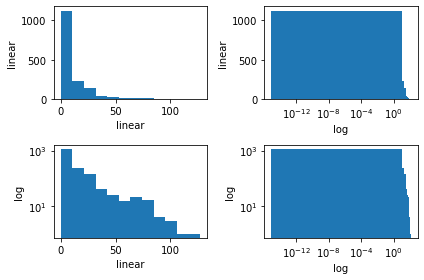

In [13]:
fig = plt.figure()
bines=np.linspace(0,np.max(lista_grados_APMS),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_APMS,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_APMS,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_APMS,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_APMS,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()

#### Bineado Log

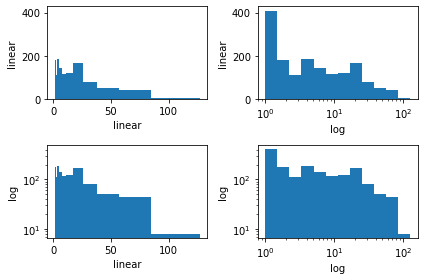

In [14]:
fig = plt.figure()
bines=np.logspace(0,np.log10(np.max(lista_grados_APMS)),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_APMS,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_APMS,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_APMS,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_APMS,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()

### Histogramas Internet

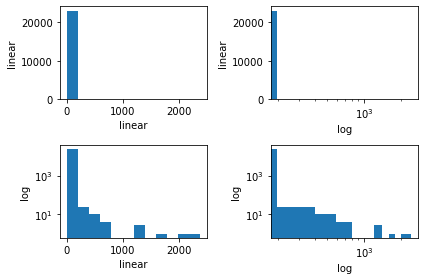

In [15]:
fig = plt.figure()
bines=np.linspace(0,np.max(lista_grados_Internet),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_Internet,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_Internet,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_Internet,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_Internet,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()


#### Bineado Log

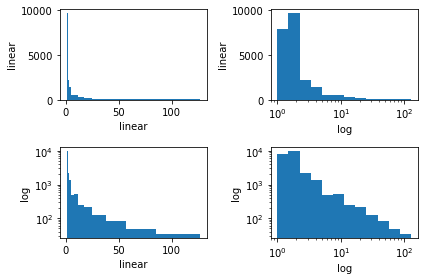

In [16]:
fig = plt.figure()
bines=np.logspace(0,np.log10(np.max(lista_grados_APMS)),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_Internet,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_Internet,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_Internet,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_Internet,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()

### Histogramas Colaboraciones

#### Bineado lineal

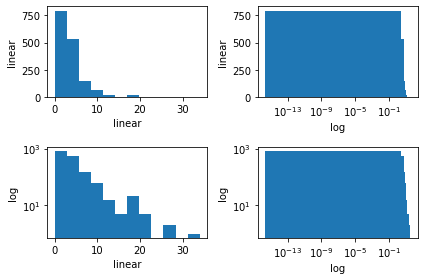

In [17]:
fig = plt.figure()
bines=np.linspace(0,np.max(lista_grados_Colaboraciones),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()

#### Bineado log

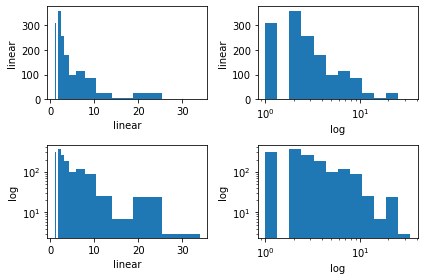

In [18]:
fig = plt.figure()
bines=np.logspace(0,np.log10(np.max(lista_grados_Colaboraciones)),13)
plt.subplot(2,2,1)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('linear');plt.yscale('linear')
plt.xlabel('linear');plt.ylabel('linear')
plt.subplot(2,2,2)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('log');plt.yscale('linear')
plt.xlabel('log');plt.ylabel('linear')
plt.subplot(2,2,3)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('linear');plt.yscale('log')
plt.xlabel('linear');plt.ylabel('log')
plt.subplot(2,2,4)
plt.hist(lista_grados_Colaboraciones,bines)
plt.xscale('log');plt.yscale('log')
plt.xlabel('log');plt.ylabel('log')
fig.tight_layout()

Para las cuatro redes, los gráficos que encontramos más informativos fueron aquellos en escala lineal y logarítmica con bineado lineal, donde distinguimos que, en general, tenían muchos nodos de grado bajo y pocos de grado alto (esta tendencia la observamos más marcadamente en las redes APMS y de colaboraciones).
Además, observamos que en la escala logarítmica con bineado logarítmico las cuatro redes parecen seguir alguna tendencia lineal, por lo que, en este primer análisis, las cuatro redes son candidatas a seguir una ley de potencia. 


## Item B

### Ajuste APMS

In [19]:
results_APMS = powerlaw.Fit(lista_grados_APMS)

Calculating best minimal value for power law fit


Kmin = 20.0
gamma = 2.949593231521825


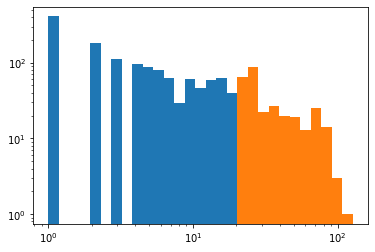

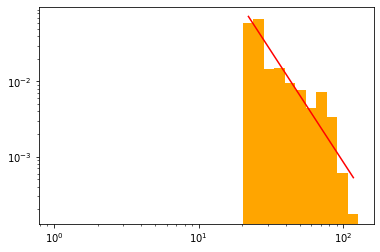

In [25]:
bines=np.logspace(0,np.log10(np.max(lista_grados_APMS)),30)
Kmin_APMS = results_APMS.power_law.xmin #este sería nuestro Kmin
gamma_APMS = results_APMS.power_law.alpha #este sería nuestro gamma
print('Kmin = '+str(Kmin_APMS))
print('gamma = '+str(gamma_APMS))

plt.figure()
array_APMS = np.array(lista_grados_APMS)
hist = plt.hist(lista_grados_APMS,bines)
hist = plt.hist(array_APMS[array_APMS>Kmin_APMS],bines)
plt.xscale('log');plt.yscale('log')
x = np.zeros(len(hist[1])-1)
for i in range(len(x)):
  x[i] = (hist[1][i+1]+hist[1][i])/2

plt.figure()
hist = plt.hist(array_APMS[array_APMS>Kmin_APMS],bines,density = True,color='orange')
plt.xscale('log');plt.yscale('log')
plt.plot(x[x>Kmin_APMS],(gamma_APMS-1)*Kmin_APMS**(gamma_APMS-1)*x[x>Kmin_APMS]**(-gamma_APMS),'r')

### Ajuste Internet

In [24]:
results_Internet = powerlaw.Fit(lista_grados_Internet)

Calculating best minimal value for power law fit


Kmin = 20.0
gamma = 2.14665851515244


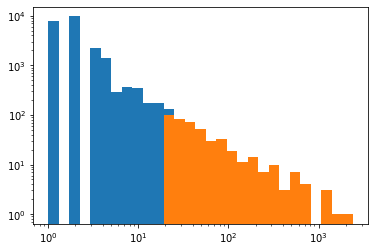

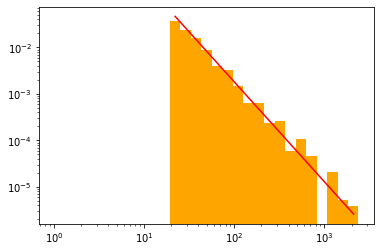

In [26]:
bines=np.logspace(0,np.log10(np.max(lista_grados_Internet)),30)
Kmin_Internet = results_Internet.power_law.xmin #este sería nuestro Kmin
gamma_Internet = results_Internet.power_law.alpha #este sería nuestro gamma
print('Kmin = '+str(Kmin_Internet))
print('gamma = '+str(gamma_Internet))

plt.figure()
array_Internet = np.array(lista_grados_Internet)
hist = plt.hist(lista_grados_Internet,bines)
hist = plt.hist(array_Internet[array_Internet>Kmin_Internet],bines)
plt.xscale('log');plt.yscale('log')
x = np.zeros(len(hist[1])-1)
for i in range(len(x)):
  x[i] = (hist[1][i+1]+hist[1][i])/2

plt.figure()
hist = plt.hist(array_Internet[array_Internet>Kmin_Internet],bines,density = True,color='orange')
plt.xscale('log');plt.yscale('log')
plt.plot(x[x>Kmin_Internet],(gamma_Internet-1)*Kmin_Internet**(gamma_Internet-1)*x[x>Kmin_Internet]**(-gamma_Internet),'r')

Encontró Kmin y gamma, y gamma entre 1 y 3 --> ley de potencia/red libre de escala

### Ajuste Colaboraciones

In [27]:
results_Colaboraciones = powerlaw.Fit(lista_grados_Colaboraciones)

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Kmin = 7.0
gamma = 4.169266994594532


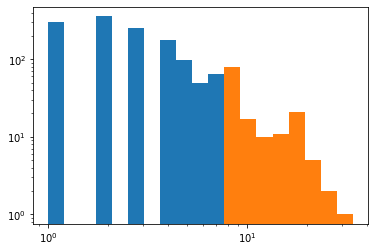

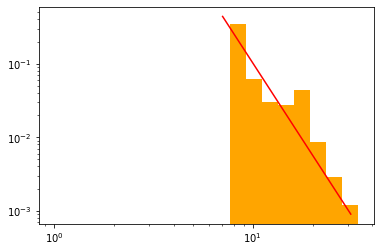

In [28]:
bines=np.logspace(0,np.log10(np.max(lista_grados_Colaboraciones)),20)
Kmin_Colaboraciones = results_Colaboraciones.power_law.xmin #este sería nuestro Kmin
gamma_Colaboraciones = results_Colaboraciones.power_law.alpha #este sería nuestro gamma
print('Kmin = '+str(Kmin_Colaboraciones))
print('gamma = '+str(gamma_Colaboraciones))

plt.figure()
array_Colaboraciones = np.array(lista_grados_Colaboraciones)
hist = plt.hist(lista_grados_Colaboraciones,bines)
hist = plt.hist(array_Colaboraciones[array_Colaboraciones>Kmin_Colaboraciones],bines)
plt.xscale('log');plt.yscale('log')
x = np.zeros(len(hist[1])-1)
for i in range(len(x)):
  x[i] = (hist[1][i+1]+hist[1][i])/2

plt.figure()
hist = plt.hist(array_Colaboraciones[array_Colaboraciones>Kmin_Colaboraciones],bines,density = True,color='orange')
plt.xscale('log');plt.yscale('log')
plt.plot(x[x>Kmin_Colaboraciones],(gamma_Colaboraciones-1)*Kmin_Colaboraciones**(gamma_Colaboraciones-1)*x[x>Kmin_Colaboraciones]**(-gamma_Colaboraciones),'r')

Encuentra parámetros Kmin y gamma pero gamma > 3 --> por definición, si obtenemos gamma > 3 es dificil diferenciar la red de redes random.

Para las cuatro redes se pudo estimar el par Kmin, γ (parámetros del ajuste), por lo que en principio todas podrían ser leyes de potencia. Sin embargo, cuando $\gamma > 3$ tanto el valor de $<k>$ y $<k2>$ son finitos, y es difícil diferenciarlos de los que podríamos obtener a partir de una red random. Entonces, solo las redes Internet y APMS se ajustan bien a una ley de potencia. 

Ambas redes parecen tener una menor cantidad de nodos con k pequeño que los esperados. Dada la metodología por la que se armó la red APMS, tiene sentido que haya pocas proteínas a las que no se les asignó muchas interacciones; además, la cantidad de proteínas estudiadas por esta técnica es limitada. Por otro lado, a pesar que la red Internet es, por su naturaleza, mucho más grande que la red APMS, se sigue tratando de una red real con un número limitado de nodos.

El efecto borde para k altos es más apreciable en la red APMS, lo cual podría ser otra vez consecuencia de la metodología (la espectrometría de masa para reconocer compuestos tiene limitaciones) y el número de proteínas que forman la red (como mencionado anteriormente). En cambio, dado que la red Internet es mucho más grande, es coherente que el efecto no sea tan pronunciado.



## Item C:

In [29]:
def calcular_grado_medio(red):
    return sum(val for node, val in red.degree()) / len(red)

In [30]:
grado_medio_Y2H = calcular_grado_medio(Red_Y2H)
print(grado_medio_Y2H)
grado_medio_APMS = calcular_grado_medio(Red_APMS)
print(grado_medio_APMS)
grado_medio_Internet = calcular_grado_medio(Red_Internet)
print(grado_medio_Internet)
grado_medio_Colaboraciones = calcular_grado_medio(Red_Colaboraciones)
print(grado_medio_Colaboraciones)

2.9038652130822595
11.183723797780518
4.217078592912253
3.4512271869100064


Las dos redes que mejor se ajustan a una ley de potencia tienen $2 < γ < 3$, por lo que $<k2>$ diverge. Esto significa que la distribución de grado de la red es  “ancha”: los valores de k varían mucho y $<k>$ es poco representativo de la distribución. 

# Problema 2 - Asortatividad

## Item a: 
- Quiero ver si la red es asortativa o no respecto del grado

In [130]:
Red_Colaboraciones = nx.read_gml('TC02_data/netscience.gml') 

Data_Internet = abrir_txt('TC02_data/as-22july06_edgelist.txt')
Data_Internet=[[col1,col2] for (col1,col2,col3) in Data_Internet]
Red_Internet=nx.Graph()
Red_Internet.add_edges_from(Data_Internet)


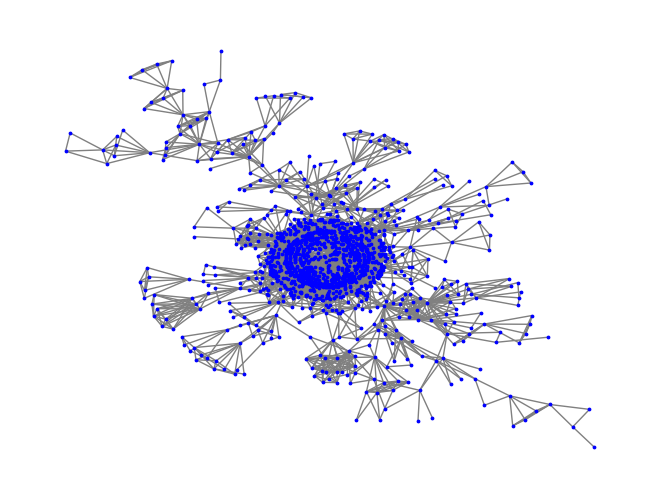

In [129]:
nx.draw_kamada_kawai(Red_Colaboraciones, node_size=3, node_color='blue', edge_color='gray')

### i) Determine, para nodos de grado k, cuánto vale el promedio del grado de sus vecinos ($k_{nn}(k)$).

Resuelvo para la red de colaboracion y armo la función para iterar sobre las demas redes al final

In [5]:
nodos = Red_Colaboraciones.nodes()
dic_resultados = {}

for nodo in list(Red_Colaboraciones.nodes()):
	vecino_nodo = [n for n in Red_Colaboraciones.neighbors(nodo)]
	k_vecinos = [Red_Colaboraciones.degree(vecino) for vecino in vecino_nodo if Red_Colaboraciones.degree(vecino) != 0]
	knn = [0 if len(k_vecinos) == 0 else np.mean(k_vecinos)]

	dic_resultados[nodo] = {'grado': Red_Colaboraciones.degree(nodo), 'knn': knn[0]}

# dic_resultados	# Tiene formato {'nodo': {'grado': grado, 'knn': knn}}

df_resultados = pd.DataFrame(dic_resultados).T
df_resultados.grado = df_resultados.grado.astype(int)
df_resultados

,grado,knn
"ABRAMSON, G",2,2.500000
"KUPERMAN, M",3,1.666667
"ACEBRON, J",4,4.000000
"BONILLA, L",4,4.000000
"PEREZVICENTE, C",4,4.000000
...,...,...
"MONDRAGON, R",1,1.000000
"ZHU, H",2,1.000000
"HUANG, Z",1,2.000000
"ZHU, J",1,2.000000


#### Observación: Voy a correr el script para la Red de Colabaraciones. Luego replicaré esto mismo en una función cerrada para iterar sobre las demas redes. Las conclusiones las escribiré luego de esto

### ii) Grafico knn vs k

In [6]:
# Calculo knn_medio agrupado por el grado
df_medio = df_resultados.groupby(['grado']).mean()
df_medio['grado'] = df_medio.index
df_medio = df_medio[['grado', 'knn']]

df_medio = df_medio.reset_index(drop=True)
df_medio

,grado,knn
0,0,0.000000
1,1,2.684039
2,2,3.837989
3,3,5.051881
4,4,5.726389
5,5,6.381633
6,6,6.693878
7,7,7.764835
8,8,8.213235
9,9,8.642512


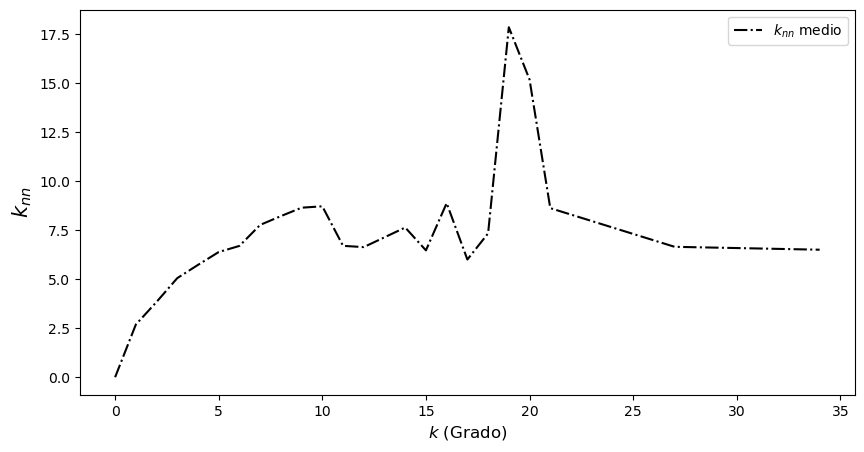

In [27]:
plt.style.use('default')
# plt.style.use('seaborn-darkgrid') o 'dark_background' con linea blanca queda lindo

plt.figure(figsize=(10, 5))

plt.plot(df_medio.grado, df_medio.knn, ls = 'dashdot', color = 'k', label = '$k_{nn}$ medio')

plt.xlabel('$k$ (Grado)', fontsize = 12)
plt.ylabel('$k_{nn}$', fontsize = 15)

plt.legend()

### iii) Ley de potencias

Asumiendo que $k_{nn}(k) = ak^μ$, estime el exponente de correlación a partir de
realizar una regresión de log k_{nn} ~ log k. Asegurese de graficar el ajuste lineal en
el grafico anterior.

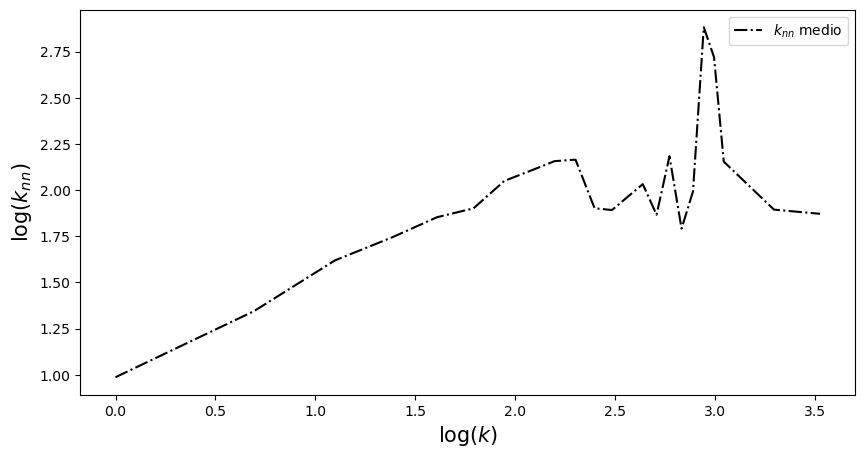

In [90]:
# Paso a escala log - log 

if df_medio.grado[0] == 0: #primero elimino lo de grado 0 (puntos aislados) para evitar problemas con el logaritmo
	df_medio_sinCero = df_medio[1:]
else:
	df_medio_sinCero = df_medio

df_medio_sinCero = df_medio_sinCero.copy() #Tiene todo el sentido del mundo, lo juro. Cuando agrego columnas a la "no copia" se me queja porque quiere modificar sobre df_medio

k_log = np.log(df_medio_sinCero['grado']) #Uso logaritmo natural porque me gusta más
knn_log = np.log(df_medio_sinCero['knn'])

plt.figure(figsize=(10, 5))

plt.plot(k_log, knn_log, ls = 'dashdot', color = 'k', label = '$k_{nn}$ medio')
plt.xlabel('$\log(k)$', fontsize = 15)
plt.ylabel('$\log(k_{nn})$', fontsize = 15)
plt.legend()

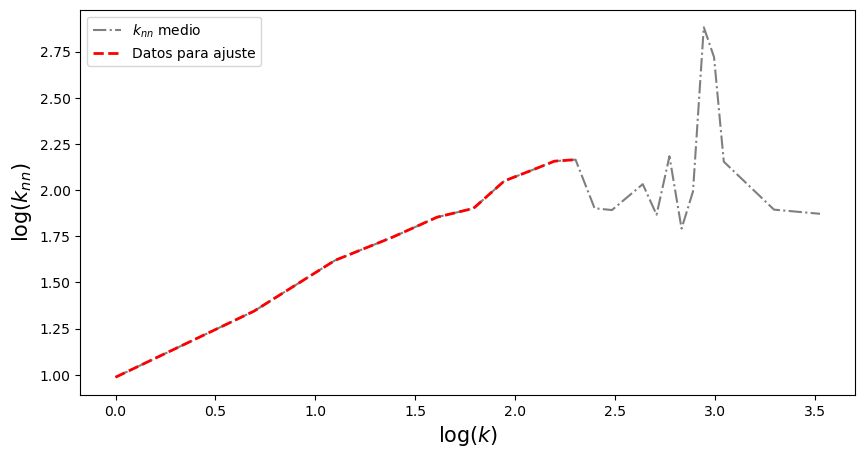

In [102]:
# Como tengo muchos datos que van a generar ruido en mi ajuste lineal, voy a tomar solo una porción de estos
df_medio_sinCero['logk'] = np.array(k_log)
df_medio_sinCero['logknn'] = np.array(knn_log)
df_medio_sinCero

df_medio_ajuste = df_medio_sinCero[df_medio_sinCero.logk < 2.35] #Cota hasta donde usar para ajustar

plt.figure(figsize=(10, 5))

plt.plot(k_log, knn_log, ls = 'dashdot', color = 'k', label = '$k_{nn}$ medio', alpha = 0.5)
plt.plot(df_medio_ajuste.logk, df_medio_ajuste.logknn, ls = 'dashed', lw = 2, color = 'r', label = 'Datos para ajuste')

plt.xlabel('$\log(k)$', fontsize = 15)
plt.ylabel('$\log(k_{nn})$', fontsize = 15)
plt.legend()

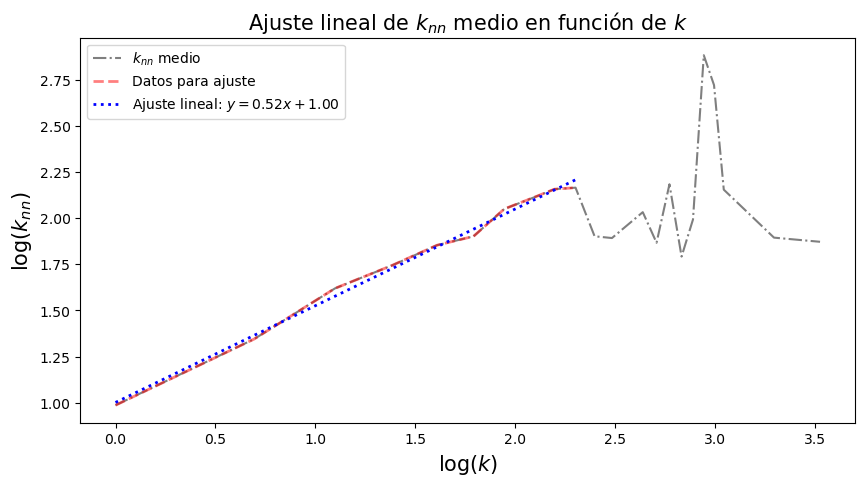

In [110]:
fit = np.polyfit(df_medio_ajuste.logk, df_medio_ajuste.logknn, 1, full = True)

plt.figure(figsize=(10, 5))

plt.plot(k_log, knn_log, ls = 'dashdot', color = 'k', label = '$k_{nn}$ medio', alpha = 0.5)
plt.plot(df_medio_ajuste.logk, df_medio_ajuste.logknn, ls = 'dashed', lw = 2, color = 'r', label = 'Datos para ajuste', alpha = 0.5)
plt.plot(df_medio_ajuste.logk, np.polyval(fit[0], df_medio_ajuste.logk), ls = 'dotted', lw = 2, color = 'b', label = 'Ajuste lineal: $y = {:.2f}x + {:.2f}$'.format(fit[0][0], fit[0][1]))

plt.xlabel('$\log(k)$', fontsize = 15)
plt.ylabel('$\log(k_{nn})$', fontsize = 15)
plt.title('Ajuste lineal de $k_{nn}$ medio en función de $k$', fontsize = 15)
plt.legend()

- Defino el script anterior para correr sobre las demas redes

In [189]:
def analisis_grado_knn(Red):
	dic_resultados = {}

	for nodo in list(Red.nodes()):
		vecino_nodo = [n for n in Red.neighbors(nodo)]
		k_vecinos = [Red.degree(vecino) for vecino in vecino_nodo if Red.degree(vecino) != 0]
		knn = [0 if len(k_vecinos) == 0 else np.mean(k_vecinos)]

		dic_resultados[nodo] = {'grado': Red.degree(nodo), 'knn': knn[0]}

	df_resultados = pd.DataFrame(dic_resultados).T
	df_resultados.grado = df_resultados.grado.astype(int)

	df_medio = df_resultados.groupby(['grado']).mean()
	df_medio['grado'] = df_medio.index
	df_medio = df_medio[['grado', 'knn']]

	df_medio = df_medio.reset_index(drop=True)

	plt.style.use('default')
	plt.figure(figsize=(10, 5))
	plt.plot(df_medio.grado, df_medio.knn, ls = 'dashdot', color = 'k', label = '$k_{nn}$ medio')
	plt.xlabel('$k$ (Grado)', fontsize = 12)
	plt.ylabel('$k_{nn}$', fontsize = 15)
	plt.legend()


	if df_medio.grado[0] == 0: #primero elimino lo de grado 0 (puntos aislados) para evitar problemas con el logaritmo
		df_medio_sinCero = df_medio[1:]
	else:
		df_medio_sinCero = df_medio

	df_medio_sinCero = df_medio_sinCero.copy() #Tiene todo el sentido del mundo, lo juro. Cuando agrego columnas a la "no copia" se me queja porque quiere modificar sobre df_medio

	k_log = np.log10(df_medio_sinCero['grado']) #Uso logaritmo natural porque me gusta más
	knn_log = np.log10(df_medio_sinCero['knn'])

	df_medio_sinCero['logk'] = np.array(k_log)
	df_medio_sinCero['logknn'] = np.array(knn_log)
	df_medio_sinCero

	if Red == Red_Colaboraciones:
		Red_str = 'Red Colaboraciones'
		df_medio_ajuste = df_medio_sinCero[df_medio_sinCero.logk < 2.35] #Cota hasta donde usar para ajustar
	elif Red == Red_Internet:
		Red_str = 'Red Internet'
		df_medio_ajuste = df_medio_sinCero[(df_medio_sinCero.logk < 1.7) | (df_medio_sinCero.logk > 2.5)] #Cota hasta donde usar para ajustar
	elif Red == Red_Y2H:
		Red_str = 'Red Y2H'
		df_medio_ajuste = df_medio_sinCero[df_medio_sinCero.logk >= 0]
	elif Red == Red_APMS:
		Red_str = 'Red APMS'
		df_medio_ajuste = df_medio_sinCero[df_medio_sinCero.logk >= 0]
		
	fit = np.polyfit(df_medio_ajuste.logk, df_medio_ajuste.logknn, 1, full = True)

	plt.figure(figsize=(10, 5))

	plt.plot(k_log, knn_log, 'o', color = 'k', label = '$k_{nn}$ medio', alpha = 0.5)
	plt.plot(df_medio_ajuste.logk, df_medio_ajuste.logknn, 'o', color = 'r', label = 'Datos para ajuste', alpha = 0.5)
	plt.plot(df_medio_ajuste.logk, np.polyval(fit[0], df_medio_ajuste.logk), ls = 'dotted', lw = 2, color = 'b', label = 'Ajuste lineal: $y = {:.2f}x + {:.2f}$'.format(fit[0][0], fit[0][1]))

	plt.xlabel('$\log(k)$', fontsize = 15)
	plt.ylabel('$\log(k_{nn})$', fontsize = 15)
	plt.title('Ajuste lineal de $k_{nn}$ medio en función de $k$ para '+Red_str, fontsize = 15)
	plt.legend()

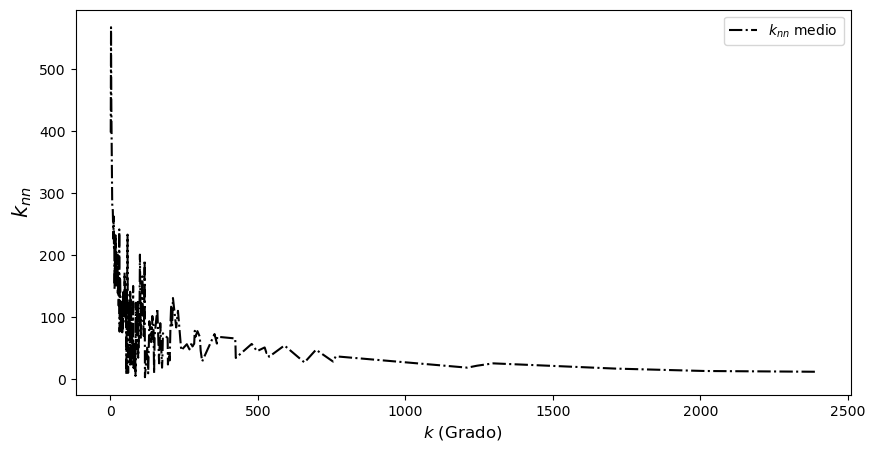

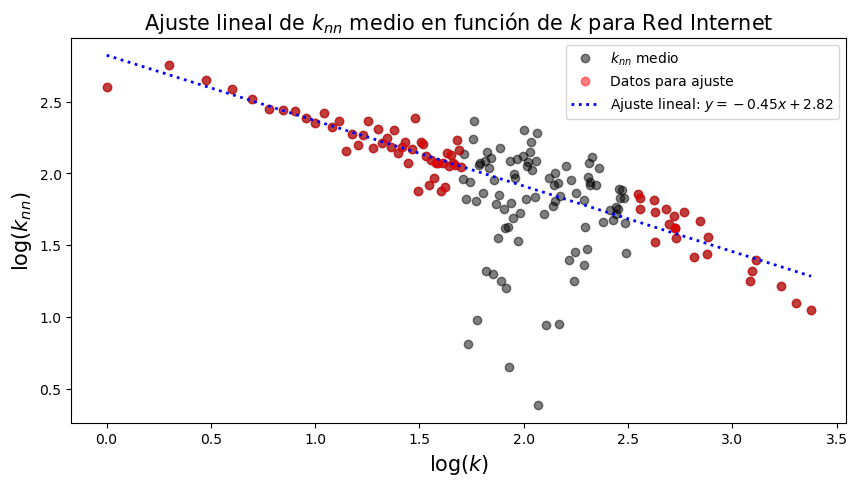

In [183]:
analisis_grado_knn(Red_Internet)

### iv) Asortatividad cuantitativa

In [127]:
def r_newmann(red):
	enlaces = list(red.edges())
	se = 0
	for i in range(len(enlaces)):
		se += 2*red.degree(enlaces[i][0])*red.degree(enlaces[i][1])

	s1 = sum([red.degree(nodo) for nodo in red.nodes()])
	s2 = sum([red.degree(nodo)**2 for nodo in red.nodes()])
	s3 = sum([red.degree(nodo)**3 for nodo in red.nodes()])
	
	return (s1*se - s2**2)/(s1*s3 - s2**2)

In [128]:
r_newmann(Red_Colaboraciones)

0.4616224667525835

 
i. Dado knn(k), la red de colaboraciones podría ser disortativa -ya que los nodos de mayor grado presentan vecinos de grados bajos (ej: $k_{nn}(21) = 8.6$)-, o asortativa -ya que el knn para los nodos de grados chicos parece ser en general similar a su grado y tender a $8$.
La red de Internet parece ser claramente disortativa, ya que los nodos de bajo k tiene un knn mucho mayor (ej: $k_{nn}=444.9$), y al revés para los nodos de k alto (ej: $k_{nn}(1298) = 24.8$)

ii. Dado el gráfico en escala lineal, la red de colaboraciones parece ajustar a una recta de pendiente 0, por lo que podría ser en realidad neutra; sin embargo, en escala logarítmica, muestra una tendencia lineal de pendiente positiva (tomando el knn(k) de los nodos de menor grado).
Por otro lado, la red Internet muestra una clara tendencia lineal negativa en la escala logarítmica.

iii. En la red de colaboraciones nos quedamos con los puntos que -visualmente- seguían un régimen lineal  (54% del total), obteniendo un $\mu > 0$ ($\mu = 0,52$). La red entonces tiene una tendencia asortativa para los $k$ pequeños.
En la red Internet consideramos outliers a los puntos que oscilan respecto al régimen lineal en la escala lineal, obteniendo un $\mu < 0$ ($\mu = - 0,45$). La red Internet es disortativa.

iv. El estimador r es mayor a $0$ ($r = 0,46$) para la red de colaboraciones, que es similar al obtenido por Barabási ($\mu = 0,52$). Dado que se trata de dos métodos que buscan describir la misma característica de la red, es esperable que den similar.
Sin embargo, para la red Internet es menor que 0 ($r = -0,20$) y difiere en un factor $2$ al $\mu$ estimado ($\mu = -0,45$). Para explicar esta diferencia hay que considerar el marco teórico en que se basan ambas técnicas. El método de Barabási parte de suponer que la red sigue una ley de potencia. Es entonces esperable que de diferente al método de Newmann (y sea entonces más confiable) para las redes que cumplen el supuesto, en este caso, la red Internet.


## Item B:

In [170]:
Data_Y2H = abrir_txt('TC02_data/yeast_Y2H.txt')

Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)

Red_APMS = nx.Graph()
Red_APMS.add_edges_from(abrir_txt('TC02_data/yeast_AP-MS.txt'))

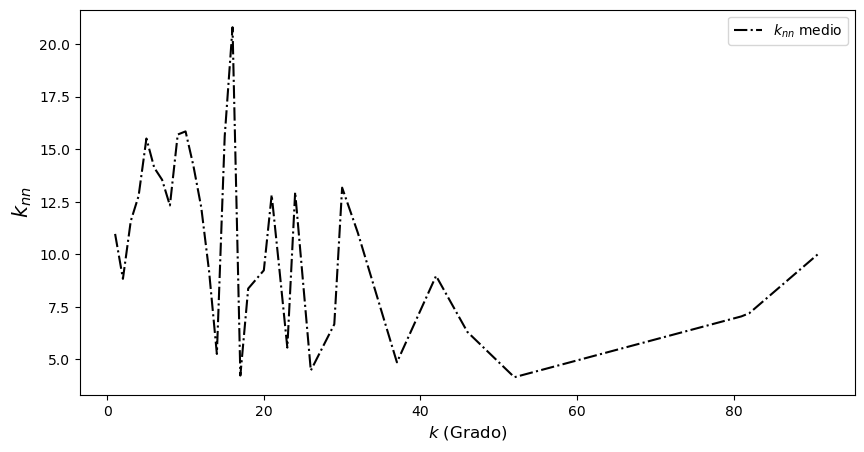

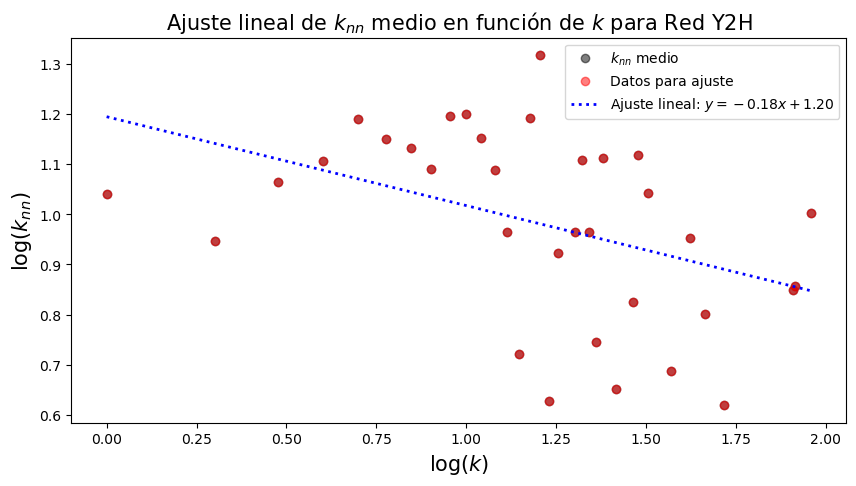

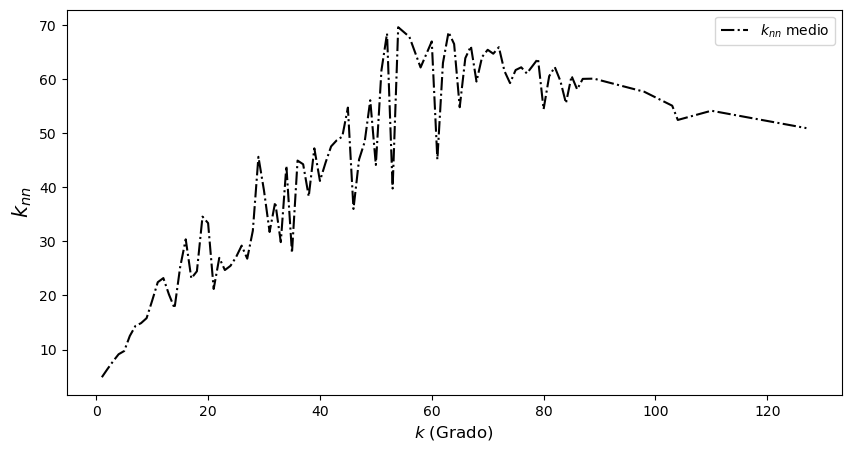

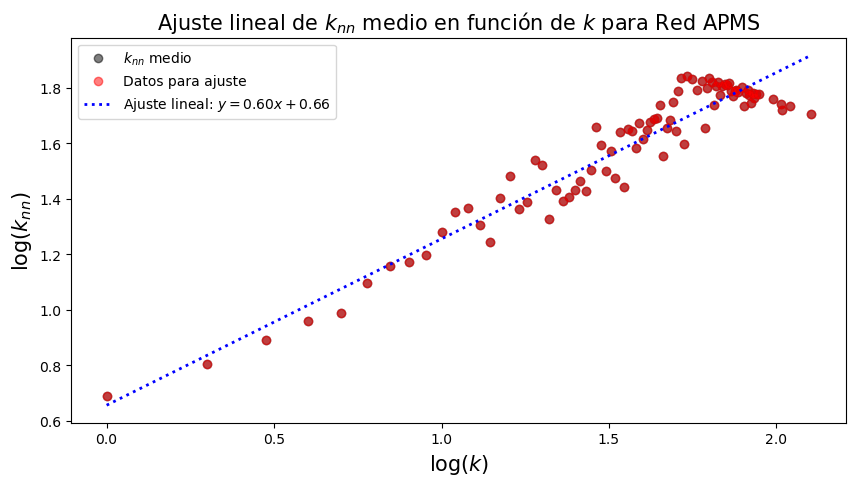

In [191]:
analisis_grado_knn(Red_Y2H)  # No tienen correlacion, es decir que no siguen ley de potencias
analisis_grado_knn(Red_APMS)  # Correlacion positiva

Dados los gráficos de $k_{nn}(k)$ vs $k$ en la escala lineal, la red Y2H parece ser neutra, aunque su ajuste lineal en la escala logarítmica estima un $\mu < 0$ ($-0,18$). Sin embargo, los datos usados para hacer la regresión muestran mucha dispersión, así que sería conveniente analizar si la fórmula de Barabási podría estar sesgada dada la topología de la red.
En cambio, la red APMS presenta una clara tendencia asortativa en la escala lineal, y ajusta a una recta con un $\mu > 0$ ($0,60$)